# R-DESeq2 Analysis Paired End data

## Pre processing

In [1]:
import pandas as pd
import os

In [2]:
def env_var(envar, var):
    import os
    os.environ[envar] = var
    return


def is_gzipped_content(file_path):
    try:
        with open(file_path, 'rb') as f:
            # Read the first two bytes to check for the gzip magic number
            magic_number = f.read(2)
            return magic_number == b'\x1f\x8b'
    except OSError:
        return False
    
    
#print(refGenomePath)
#jobIdxPE + '/RefGenome.fa'
def decompress_gzipped(org, dest):
    os.system('gzip -d ' + org + ' -c > ' + dest)
    return

In [3]:
PEPath = "/mnt/d/PE/Avena/"
jobIdxPE = "AvenaSub1.5M-RNASeq-PE"
env_var("PEPath", PEPath)
env_var("jobIdxPE", jobIdxPE)

In [4]:
os.chdir(PEPath)

In [5]:
!echo $PEPath
!echo $jobIdxPE

/mnt/d/PE/Avena/
AvenaSub1.5M-RNASeq-PE


In [6]:
metaPE = pd.read_csv(PEPath + jobIdxPE + "/metadata.csv", sep = ',')
display(metaPE)

,file1,file2,type,shortName,meta1,meta2,meta3,replicate,trimmed1,trimmed2
0,sub1.5M-Ctrl_Estres_R1_1.fastq.gz,sub1.5M-Ctrl_Estres_R1_2.fastq.gz,paired,cont_estres_R1,Estres,Inoculado,A,1,sub1.5M-Ctrl_Estres_R1_1_paired.fastq.gz,sub1.5M-Ctrl_Estres_R1_2_paired.fastq.gz
1,sub1.5M-Ctrl_Estres_R2_1.fastq.gz,sub1.5M-Ctrl_Estres_R2_2.fastq.gz,paired,cont_estres_R2,Estres,Inoculado,A,2,sub1.5M-Ctrl_Estres_R2_1_paired.fastq.gz,sub1.5M-Ctrl_Estres_R2_2_paired.fastq.gz
2,sub1.5M-Ctrll_Estres_R3_1.fastq.gz,sub1.5M-Ctrll_Estres_R3_2.fastq.gz,paired,cont_estres_R3,Estres,Inoculado,A,3,sub1.5M-Ctrll_Estres_R3_1_paired.fastq.gz,sub1.5M-Ctrll_Estres_R3_2_paired.fastq.gz
3,sub1.5M-Control_R1_1.fastq.gz,sub1.5M-Control_R1_2.fastq.gz,paired,control_R1,Control,No_inoculado,B,1,sub1.5M-Control_R1_1_paired.fastq.gz,sub1.5M-Control_R1_2_paired.fastq.gz
4,sub1.5M-Control_R2_1.fastq.gz,sub1.5M-Control_R2_2.fastq.gz,paired,control_R2,Control,No_inoculado,B,2,sub1.5M-Control_R2_1_paired.fastq.gz,sub1.5M-Control_R2_2_paired.fastq.gz
5,sub1.5M-Ctrl_N7_XT17_R1_1.fastq.gz,sub1.5M-Ctrl_N7_XT17_R1_2.fastq.gz,paired,ctrl_N7_XT17_R1,Control,Inoculado,C,1,sub1.5M-Ctrl_N7_XT17_R1_1_paired.fastq.gz,sub1.5M-Ctrl_N7_XT17_R1_2_paired.fastq.gz
6,sub1.5M-Ctrl_N7_XT17_R2_1.fastq.gz,sub1.5M-Ctrl_N7_XT17_R2_2.fastq.gz,paired,ctrl_N7_XT17_R2,Control,Inoculado,C,2,sub1.5M-Ctrl_N7_XT17_R2_1_paired.fastq.gz,sub1.5M-Ctrl_N7_XT17_R2_2_paired.fastq.gz
7,sub1.5M-Ctrl_N7_XT17_R3_1.fastq.gz,sub1.5M-Ctrl_N7_XT17_R3_2.fastq.gz,paired,ctrl_N7_XT17_R3,Control,Inoculado,C,3,sub1.5M-Ctrl_N7_XT17_R3_1_paired.fastq.gz,sub1.5M-Ctrl_N7_XT17_R3_2_paired.fastq.gz
8,sub1.5M-Estre_N7XT17_R1_1.fastq.gz,sub1.5M-Estre_N7XT17_R1_2.fastq.gz,paired,estres_N7_XT17_R1,Estres,No_inoculado,D,1,sub1.5M-Estre_N7XT17_R1_1_paired.fastq.gz,sub1.5M-Estre_N7XT17_R1_2_paired.fastq.gz
9,sub1.5M-Estre_N7XT17_R2_1.fastq.gz,sub1.5M-Estre_N7XT17_R2_2.fastq.gz,paired,estres_N7_XT17_R2,Estres,No_inoculado,D,2,sub1.5M-Estre_N7XT17_R2_1_paired.fastq.gz,sub1.5M-Estre_N7XT17_R2_2_paired.fastq.gz


In [7]:
os.system("mkdir -p " + PEPath + jobIdxPE + "/05-featureCounts")

0

In [8]:
!ls -ltrh $PEPath

total 4.8G
-rwxrwxrwx 1 ddelgadillo ddelgadillo   94 May 29 22:00 TruSeq3-PE.fa
-rwxrwxrwx 1 ddelgadillo ddelgadillo  478 Jul  4 09:45 Avena_codata.csv
-rwxrwxrwx 1 ddelgadillo ddelgadillo 117M Jul  4 09:50 sub1.5M-Estre_N7XT17_R3_2.fastq.gz
-rwxrwxrwx 1 ddelgadillo ddelgadillo 111M Jul  4 09:51 sub1.5M-Estre_N7XT17_R3_1.fastq.gz
-rwxrwxrwx 1 ddelgadillo ddelgadillo 115M Jul  4 09:51 sub1.5M-Estre_N7XT17_R2_2.fastq.gz
-rwxrwxrwx 1 ddelgadillo ddelgadillo 108M Jul  4 09:52 sub1.5M-Estre_N7XT17_R2_1.fastq.gz
-rwxrwxrwx 1 ddelgadillo ddelgadillo 118M Jul  4 09:52 sub1.5M-Estre_N7XT17_R1_2.fastq.gz
-rwxrwxrwx 1 ddelgadillo ddelgadillo 110M Jul  4 09:53 sub1.5M-Estre_N7XT17_R1_1.fastq.gz
-rwxrwxrwx 1 ddelgadillo ddelgadillo 115M Jul  4 09:54 sub1.5M-Ctrl_N7_XT17_R3_2.fastq.gz
-rwxrwxrwx 1 ddelgadillo ddelgadillo 109M Jul  4 09:54 sub1.5M-Ctrl_N7_XT17_R3_1.fastq.gz
-rwxrwxrwx 1 ddelgadillo ddelgadillo 114M Jul  4 09:55 sub1.5M-Ctrl_N7_XT17_R2_2.fastq.gz
-rwxrwxrwx 1 ddelgadillo ddelgadillo 1

In [9]:
!tree -d

.
└── AvenaSub1.5M-RNASeq-PE
    ├── 01-QC-Pre-Reports
    │   └── multiqc_data
    ├── 02-Trimming-Trimmomatic
    │   ├── summary
    │   └── unpaired
    ├── 03-QC-Pos-Reports
    │   └── multiqc_data
    ├── 04-RefGenome-Alignments-Hisat2
    │   └── index
    ├── 04-RefGenome-Alignments-Kallisto
    │   └── log
    ├── 04.1-Gene-Transcripts-Assembly-Quantify-Stringtie
    │   └── ballgown
    │       ├── cont_estres_R1
    │       ├── cont_estres_R2
    │       ├── cont_estres_R3
    │       ├── control_R1
    │       ├── control_R2
    │       ├── ctrl_N7_XT17_R1
    │       ├── ctrl_N7_XT17_R2
    │       ├── ctrl_N7_XT17_R3
    │       ├── estres_N7_XT17_R1
    │       ├── estres_N7_XT17_R2
    │       └── estres_N7_XT17_R3
    ├── 05-featureCounts
    └── raw

27 directories


## Standard Workflow
### Feature Count

In [10]:
refGenomeGFFAnnotationPath = jobIdxPE + '/RefGenomeAnn.gff'
refGenomeGTFAnnotationPath = jobIdxPE + '/RefGenomeAnn.gtf'

In [11]:
!featureCounts -h

featureCounts: invalid option -- 'h'

Version 2.0.6

Usage: featureCounts [options] -a <annotation_file> -o <output_file> input_file1 [input_file2] ... 

## Mandatory arguments:

  -a <string>         Name of an annotation file. GTF/GFF format by default. See
                      -F option for more format information. Inbuilt annotations
                      (SAF format) is available in 'annotation' directory of the
                      package. Gzipped file is also accepted.

  -o <string>         Name of output file including read counts. A separate file
                      including summary statistics of counting results is also
                      included in the output ('<string>.summary'). Both files
                      are in tab delimited format.

  input_file1 [input_file2] ...   A list of SAM or BAM format files. They can be
                      either name or location sorted. If no files provided,
                      <stdin> input is expected. Location-sorted pai

In [12]:
nThreads = '8'

In [13]:
#!cat ids.txt | parallel -j 1 echo "bam/{}.bam" | xargs featureCounts -p -a refs/features.gff -o counts.txt

cmdFC = "featureCounts -p -T " + nThreads + " -o " + PEPath + jobIdxPE + "/05-featureCounts/rawCounts -a " +  PEPath + jobIdxPE + "/RefGenomeAnn.gtf"  
for i in metaPE.index:
    #print(metaPE.shortName[i])
    cmdFC += " " + PEPath + jobIdxPE + "/04-RefGenome-Alignments-Hisat2/" + metaPE.shortName[i] + ".bam"

os.system(cmdFC)


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
	  v2.0.6

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 11 BAM files                                     ||
||                                                                            ||
||                           cont_estres_R1.bam                               ||
||                           cont_estres_R2.bam                               ||
||                           cont_estres_R3.bam                  

||    Paired-end reads are included.                                          ||
||    The reads are assigned on the single-end mode.                          ||
||    Total alignments : 2739791                                              ||
||    Successfully assigned alignments : 902280 (32.9%)                       ||
||    Running time : 0.11 minutes                                             ||
||                                                                            ||
|| Process BAM file estres_N7_XT17_R3.bam...                                  ||
||    Paired-end reads are included.                                          ||
||    The reads are assigned on the single-end mode.                          ||
||    Total alignments : 2138074                                              ||
||    Successfully assigned alignments : 990132 (46.3%)                       ||
||    Running time : 0.08 minutes                                             ||
||                          

0

### DESeq2

In [114]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [115]:
%%R -i PEPath,jobIdxPE
setwd(paste0(PEPath,jobIdxPE))
list.files()

 [1] "01-QC-Pre-Reports"                                
 [2] "02-Trimming-Trimmomatic"                          
 [3] "03-QC-Pos-Reports"                                
 [4] "04-RefGenome-Alignments-Hisat2"                   
 [5] "04-RefGenome-Alignments-Kallisto"                 
 [6] "04.1-Gene-Transcripts-Assembly-Quantify-Stringtie"
 [7] "05-featureCounts"                                 
 [8] "heatmap24.pdf"                                    
 [9] "metadata.csv"                                     
[10] "raw"                                              
[11] "RefGenome.fa"                                     
[12] "RefGenome.fa.fai"                                 
[13] "RefGenomeAnn.gff"                                 
[14] "RefGenomeAnn.gtf"                                 


In [116]:
%%R
counts_file <- "05-featureCounts/rawCounts"
df <- read.table(counts_file, header=TRUE)
head(df)


                      Geneid
1 AVESA.00001b.r3.1Ag0000001
2 AVESA.00001b.r3.1Ag0000002
3 AVESA.00001b.r3.1Ag0000003
4 AVESA.00001b.r3.1Ag0000004
5 AVESA.00001b.r3.1Ag0000005
6 AVESA.00001b.r3.1Ag0000006
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

1                                                                                                                                                                                                                                                                                                                                                                                                                                     +;+;+
2                                                                                                                                                                                                                                                                                                                                                                                                       +;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+
3                                                                                                                                               

In [117]:
%%R
design_file = "metadata.csv"
sample_data <- read.csv(design_file, stringsAsFactors=F)
head(sample_data)


                               file1                              file2   type
1  sub1.5M-Ctrl_Estres_R1_1.fastq.gz  sub1.5M-Ctrl_Estres_R1_2.fastq.gz paired
2  sub1.5M-Ctrl_Estres_R2_1.fastq.gz  sub1.5M-Ctrl_Estres_R2_2.fastq.gz paired
3 sub1.5M-Ctrll_Estres_R3_1.fastq.gz sub1.5M-Ctrll_Estres_R3_2.fastq.gz paired
4      sub1.5M-Control_R1_1.fastq.gz      sub1.5M-Control_R1_2.fastq.gz paired
5      sub1.5M-Control_R2_1.fastq.gz      sub1.5M-Control_R2_2.fastq.gz paired
6 sub1.5M-Ctrl_N7_XT17_R1_1.fastq.gz sub1.5M-Ctrl_N7_XT17_R1_2.fastq.gz paired
        shortName   meta1        meta2 meta3 replicate
1  cont_estres_R1  Estres    Inoculado     A         1
2  cont_estres_R2  Estres    Inoculado     A         2
3  cont_estres_R3  Estres    Inoculado     A         3
4      control_R1 Control No_inoculado     B         1
5      control_R2 Control No_inoculado     B         2
6 ctrl_N7_XT17_R1 Control    Inoculado     C         1
                                   trimmed1
1  sub1.5M-Ctrl_Es

In [118]:
%%R
condition <- "meta1"

In [119]:
%%R
sample_data[,condition]

 [1] "Estres"  "Estres"  "Estres"  "Control" "Control" "Control" "Control"
 [8] "Control" "Estres"  "Estres"  "Estres" 


In [120]:
%%R
sample_data$condition <- factor(sample_data[,condition])
sample_data$condition <- relevel(sample_data$condition, toString(sample_data$condition[1]))

counts <- df[ ,c(1, 7:length(names(df)))]
head(counts)

                      Geneid
1 AVESA.00001b.r3.1Ag0000001
2 AVESA.00001b.r3.1Ag0000002
3 AVESA.00001b.r3.1Ag0000003
4 AVESA.00001b.r3.1Ag0000004
5 AVESA.00001b.r3.1Ag0000005
6 AVESA.00001b.r3.1Ag0000006
  X.mnt.d.PE.Avena.AvenaSub1.5M.RNASeq.PE.04.RefGenome.Alignments.Hisat2.cont_estres_R1.bam
1                                                                                         0
2                                                                                         0
3                                                                                        57
4                                                                                         0
5                                                                                        76
6                                                                                         3
  X.mnt.d.PE.Avena.AvenaSub1.5M.RNASeq.PE.04.RefGenome.Alignments.Hisat2.cont_estres_R2.bam
1                                                            

In [121]:
%%R
names(counts) <- c("name", sample_data$shortName)
head(counts)

                        name cont_estres_R1 cont_estres_R2 cont_estres_R3
1 AVESA.00001b.r3.1Ag0000001              0              0              0
2 AVESA.00001b.r3.1Ag0000002              0              0              0
3 AVESA.00001b.r3.1Ag0000003             57             40             40
4 AVESA.00001b.r3.1Ag0000004              0              0              0
5 AVESA.00001b.r3.1Ag0000005             76             98            138
6 AVESA.00001b.r3.1Ag0000006              3              5             11
  control_R1 control_R2 ctrl_N7_XT17_R1 ctrl_N7_XT17_R2 ctrl_N7_XT17_R3
1          0          0               0               0               0
2          0          0               0               2               0
3         16         38              32              29              37
4          0          0               2               0               0
5         44        110              22              67              45
6          4          4               0           

In [122]:
%%R
output_file = "05-featureCounts/counts.csv"
write.csv(counts, file=output_file, row.names=FALSE, quote=FALSE)

In [123]:
%%R
colData <- dplyr::select(sample_data,shortName)
#colData$sample <- sample_data$shortName
colData$condition <- factor(sample_data$condition)
colData$condition = relevel(colData$condition, toString(colData$condition[1]))
head(colData)

        shortName condition
1  cont_estres_R1    Estres
2  cont_estres_R2    Estres
3  cont_estres_R3    Estres
4      control_R1   Control
5      control_R2   Control
6 ctrl_N7_XT17_R1   Control


In [124]:
%%R

sample_names <- sample_data$shortName
countData <- round(counts[, sample_names])
head(countData)

  cont_estres_R1 cont_estres_R2 cont_estres_R3 control_R1 control_R2
1              0              0              0          0          0
2              0              0              0          0          0
3             57             40             40         16         38
4              0              0              0          0          0
5             76             98            138         44        110
6              3              5             11          4          4
  ctrl_N7_XT17_R1 ctrl_N7_XT17_R2 ctrl_N7_XT17_R3 estres_N7_XT17_R1
1               0               0               0                 0
2               0               2               0                 0
3              32              29              37                33
4               2               0               0                 0
5              22              67              45               106
6               0               1               5                 0
  estres_N7_XT17_R2 estres_N7_XT17_R3
1  

In [125]:
%%R
otherCols = counts[!(names(counts) %in% sample_names)]
head(otherCols)

                        name
1 AVESA.00001b.r3.1Ag0000001
2 AVESA.00001b.r3.1Ag0000002
3 AVESA.00001b.r3.1Ag0000003
4 AVESA.00001b.r3.1Ag0000004
5 AVESA.00001b.r3.1Ag0000005
6 AVESA.00001b.r3.1Ag0000006


In [126]:
%%R
suppressPackageStartupMessages(library(DESeq2))

dds = DESeqDataSetFromMatrix(countData=countData, colData=colData, design = ~condition)
str(dds)

Formal class 'DESeqDataSet' [package "DESeq2"] with 8 slots
  ..@ design            :Class 'formula'  language ~condition
  .. .. ..- attr(*, ".Environment")=<environment: R_GlobalEnv> 
  ..@ dispersionFunction:function ()  
  ..@ rowRanges         :Formal class 'CompressedGRangesList' [package "GenomicRanges"] with 5 slots
  .. .. ..@ unlistData     :Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  .. .. .. .. ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. .. .. .. .. ..@ values         : Factor w/ 0 levels: 
  .. .. .. .. .. .. ..@ lengths        : int(0) 
  .. .. .. .. .. .. ..@ elementMetadata: NULL
  .. .. .. .. .. .. ..@ metadata       : list()
  .. .. .. .. ..@ ranges         :Formal class 'IRanges' [package "IRanges"] with 6 slots
  .. .. .. .. .. .. ..@ start          : int(0) 
  .. .. .. .. .. .. ..@ width          : int(0) 
  .. .. .. .. .. .. ..@ NAMES          : NULL
  .. .. .. .. .. .. ..@ elementType    : chr "ANY"
  .. .

converting counts to integer mode
  it appears that the last variable in the design formula, 'condition',
  has a factor level, 'Control', which is not the reference level. we recommend
  to use factor(...,levels=...) or relevel() to set this as the reference level
  before proceeding. for more information, please see the 'Note on factor levels'
  in vignette('DESeq2').


In [127]:
%%R
dse = DESeq(dds)
res = results(dse)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [128]:
%%R
res

log2 fold change (MLE): condition Control vs Estres 
Wald test p-value: condition Control vs Estres 
DataFrame with 22532 rows and 6 columns
       baseMean log2FoldChange     lfcSE      stat    pvalue      padj
      <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
1      0.000000             NA        NA        NA        NA        NA
2      0.167104      1.5535033  3.149264  0.493291 0.6218070        NA
3     35.282649      0.0614745  0.357213  0.172095 0.8633628  0.969667
4      0.388516      1.5620317  3.148955  0.496048 0.6198607        NA
5     76.949083     -0.5651678  0.273585 -2.065786 0.0388487  0.337856
...         ...            ...       ...       ...       ...       ...
22528   7.86050     -0.2947698  0.489136 -0.602633 0.5467529        NA
22529  10.84603      0.2839364  0.469634  0.604590 0.5454513  0.852317
22530   9.56978     -0.0546504  0.489714 -0.111597 0.9111433  0.977777
22531   6.31608      0.3684979  0.495099  0.744291 0.4567006        NA
22532  

In [129]:
%%R
data = cbind(otherCols, data.frame(res))
data$foldChange = 2 ^ data$log2FoldChange
names(data)[names(data)=="pvalue"] <-"PValue"
names(data)[names(data)=="padj"] <- "FDR"
data$PAdj = p.adjust(data$PValue, method="hochberg")
data = data[with(data, order(PValue, -foldChange)), ]
data$falsePos = 1:nrow(data) * data$FDR

data$baseMeanA = 1
data$baseMeanB = 1

head(data)



                            name baseMean log2FoldChange     lfcSE     stat
11547 AVESA.00001b.r3.4Ag0001489 115.6302       1.373332 0.2120250 6.477218
16995 AVESA.00001b.r3.6Ag0000216 292.6432       2.375452 0.3939438 6.029927
22000 AVESA.00001b.r3.3Ag0001778 443.6070       1.321680 0.2341150 5.645432
16994 AVESA.00001b.r3.6Ag0000215 373.5584       1.445694 0.2570140 5.624964
17559 AVESA.00001b.r3.6Ag0000780 292.1236       1.570771 0.2917545 5.383879
11315 AVESA.00001b.r3.4Ag0001257 134.8757       1.512835 0.2858030 5.293280
            PValue          FDR foldChange         PAdj     falsePos baseMeanA
11547 9.342912e-11 8.198405e-07   2.590683 1.779918e-06 8.198405e-07         1
16995 1.640340e-09 7.196992e-06   5.188984 3.124848e-05 1.439398e-05         1
22000 1.647668e-08 4.070436e-05   2.499570 3.138643e-04 1.221131e-04         1
16994 1.855469e-08 4.070436e-05   2.723939 3.534298e-04 1.628174e-04         1
17559 7.289767e-08 1.279354e-04   2.970634 1.388482e-03 6.396771e-04     

In [130]:
%%R
normed = counts(dse, normalized=TRUE)
normed = round(normed, 1)

In [131]:
%%R
head(normed)

     cont_estres_R1 cont_estres_R2 cont_estres_R3 control_R1 control_R2
[1,]            0.0            0.0            0.0        0.0        0.0
[2,]            0.0            0.0            0.0        0.0        0.0
[3,]           56.9           36.5           31.8       16.7       37.4
[4,]            0.0            0.0            0.0        0.0        0.0
[5,]           75.9           89.5          109.7       46.0      108.1
[6,]            3.0            4.6            8.7        4.2        3.9
     ctrl_N7_XT17_R1 ctrl_N7_XT17_R2 ctrl_N7_XT17_R3 estres_N7_XT17_R1
[1,]             0.0             0.0             0.0               0.0
[2,]             0.0             1.8             0.0               0.0
[3,]            68.4            26.7            33.8              24.2
[4,]             4.3             0.0             0.0               0.0
[5,]            47.0            61.6            41.1              77.7
[6,]             0.0             0.9             4.6               0.0

In [132]:
%%R
dim(normed)

[1] 22532    11


In [133]:
%%R
head(data)

                            name baseMean log2FoldChange     lfcSE     stat
11547 AVESA.00001b.r3.4Ag0001489 115.6302       1.373332 0.2120250 6.477218
16995 AVESA.00001b.r3.6Ag0000216 292.6432       2.375452 0.3939438 6.029927
22000 AVESA.00001b.r3.3Ag0001778 443.6070       1.321680 0.2341150 5.645432
16994 AVESA.00001b.r3.6Ag0000215 373.5584       1.445694 0.2570140 5.624964
17559 AVESA.00001b.r3.6Ag0000780 292.1236       1.570771 0.2917545 5.383879
11315 AVESA.00001b.r3.4Ag0001257 134.8757       1.512835 0.2858030 5.293280
            PValue          FDR foldChange         PAdj     falsePos baseMeanA
11547 9.342912e-11 8.198405e-07   2.590683 1.779918e-06 8.198405e-07         1
16995 1.640340e-09 7.196992e-06   5.188984 3.124848e-05 1.439398e-05         1
22000 1.647668e-08 4.070436e-05   2.499570 3.138643e-04 1.221131e-04         1
16994 1.855469e-08 4.070436e-05   2.723939 3.534298e-04 1.628174e-04         1
17559 7.289767e-08 1.279354e-04   2.970634 1.388482e-03 6.396771e-04     

In [134]:
%%R
dim(data)

[1] 22532    12


In [135]:
%%R
total <- merge(data, normed, by=0)
total = total[with(total, order(PValue, -foldChange)), ]
head(total)

      Row.names                       name baseMean log2FoldChange     lfcSE
1722      11547 AVESA.00001b.r3.4Ag0001489 115.6302       1.373332 0.2120250
7774      16995 AVESA.00001b.r3.6Ag0000216 292.6432       2.375452 0.3939438
13338     22000 AVESA.00001b.r3.3Ag0001778 443.6070       1.321680 0.2341150
7773      16994 AVESA.00001b.r3.6Ag0000215 373.5584       1.445694 0.2570140
8401      17559 AVESA.00001b.r3.6Ag0000780 292.1236       1.570771 0.2917545
1465      11315 AVESA.00001b.r3.4Ag0001257 134.8757       1.512835 0.2858030
          stat       PValue          FDR foldChange         PAdj     falsePos
1722  6.477218 9.342912e-11 8.198405e-07   2.590683 1.779918e-06 8.198405e-07
7774  6.029927 1.640340e-09 7.196992e-06   5.188984 3.124848e-05 1.439398e-05
13338 5.645432 1.647668e-08 4.070436e-05   2.499570 3.138643e-04 1.221131e-04
7773  5.624964 1.855469e-08 4.070436e-05   2.723939 3.534298e-04 1.628174e-04
8401  5.383879 7.289767e-08 1.279354e-04   2.970634 1.388482e-03 6.3967

In [136]:
%%R
col_names_A = data.frame(split(colData, colData$condition)[1])[,1]
col_names_B = data.frame(split(colData, colData$condition)[2])[,1]

total$baseMeanA = rowMeans(total[, col_names_A])
total$baseMeanB = rowMeans(total[, col_names_B])

total$foldChange = round(total$foldChange, 3)
total$log2FoldChange = round(total$log2FoldChange, 1)
total$baseMean  = round(total$baseMean, 1)
total$baseMeanA = round(total$baseMeanA, 1)
total$baseMeanB =  round(total$baseMeanB, 1)
total$lfcSE = round(total$lfcSE, 2)
total$stat = round(total$stat, 2)
total$FDR = round(total$FDR, 4)
total$falsePos = round(total$falsePos, 0)

total$PAdj = formatC(total$PAdj, format = "e", digits = 1)
total$PValue = formatC(total$PValue, format = "e", digits = 1)




In [137]:
%%R
head(total)

      Row.names                       name baseMean log2FoldChange lfcSE stat
1722      11547 AVESA.00001b.r3.4Ag0001489    115.6            1.4  0.21 6.48
7774      16995 AVESA.00001b.r3.6Ag0000216    292.6            2.4  0.39 6.03
13338     22000 AVESA.00001b.r3.3Ag0001778    443.6            1.3  0.23 5.65
7773      16994 AVESA.00001b.r3.6Ag0000215    373.6            1.4  0.26 5.62
8401      17559 AVESA.00001b.r3.6Ag0000780    292.1            1.6  0.29 5.38
1465      11315 AVESA.00001b.r3.4Ag0001257    134.9            1.5  0.29 5.29
       PValue   FDR foldChange    PAdj falsePos baseMeanA baseMeanB
1722  9.3e-11 0e+00      2.591 1.8e-06        0      67.0     174.0
7774  1.6e-09 0e+00      5.189 3.1e-05        0     100.7     523.0
13338 1.6e-08 0e+00      2.500 3.1e-04        0     263.6     659.6
7773  1.9e-08 0e+00      2.724 3.5e-04        0     209.2     570.8
8401  7.3e-08 1e-04      2.971 1.4e-03        0     153.8     458.0
1465  1.2e-07 1e-04      2.854 2.3e-03        

In [138]:
%%R
names(otherCols)

[1] "name"


In [139]:
%%R
#colnames(total)[1] <- "name"

new_cols = c("name", "baseMean","baseMeanA","baseMeanB","foldChange",
             "log2FoldChange","lfcSE","stat","PValue","PAdj", "FDR","falsePos",col_names_A, col_names_B)

total = total[, new_cols]

head(total)


                            name baseMean baseMeanA baseMeanB foldChange
1722  AVESA.00001b.r3.4Ag0001489    115.6      67.0     174.0      2.591
7774  AVESA.00001b.r3.6Ag0000216    292.6     100.7     523.0      5.189
13338 AVESA.00001b.r3.3Ag0001778    443.6     263.6     659.6      2.500
7773  AVESA.00001b.r3.6Ag0000215    373.6     209.2     570.8      2.724
8401  AVESA.00001b.r3.6Ag0000780    292.1     153.8     458.0      2.971
1465  AVESA.00001b.r3.4Ag0001257    134.9      73.4     208.6      2.854
      log2FoldChange lfcSE stat  PValue    PAdj   FDR falsePos cont_estres_R1
1722             1.4  0.21 6.48 9.3e-11 1.8e-06 0e+00        0           67.9
7774             2.4  0.39 6.03 1.6e-09 3.1e-05 0e+00        0          105.9
13338            1.3  0.23 5.65 1.6e-08 3.1e-04 0e+00        0          294.7
7773             1.4  0.26 5.62 1.9e-08 3.5e-04 0e+00        0          177.8
8401             1.6  0.29 5.38 7.3e-08 1.4e-03 1e-04        0          179.8
1465             1.5 

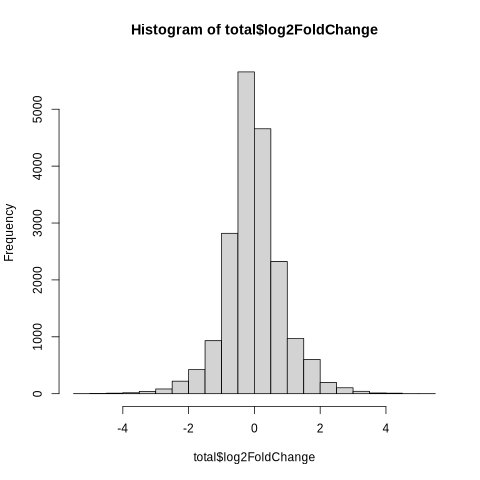

In [140]:
%%R
hist(total$log2FoldChange)

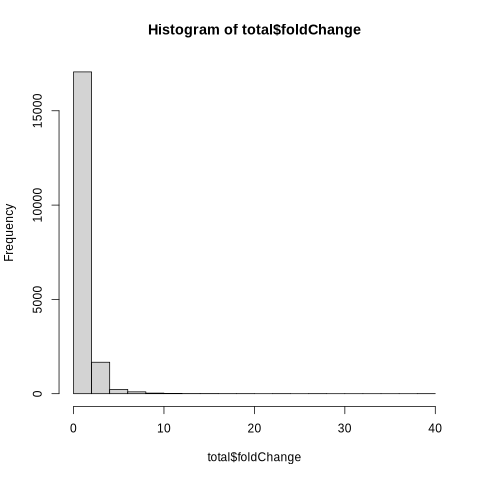

In [141]:
%%R
hist(total$foldChange)

In [142]:
%%R
#total <- total[abs(total$foldChange) >= 2,]


NULL


In [143]:
%%R
dim(total)

[1] 22532    23


In [144]:
%%R
write.csv(total, file= "05-featureCounts/results.csv", row.names=FALSE, quote=FALSE)

In [145]:
%%R
head(total)

                            name baseMean baseMeanA baseMeanB foldChange
1722  AVESA.00001b.r3.4Ag0001489    115.6      67.0     174.0      2.591
7774  AVESA.00001b.r3.6Ag0000216    292.6     100.7     523.0      5.189
13338 AVESA.00001b.r3.3Ag0001778    443.6     263.6     659.6      2.500
7773  AVESA.00001b.r3.6Ag0000215    373.6     209.2     570.8      2.724
8401  AVESA.00001b.r3.6Ag0000780    292.1     153.8     458.0      2.971
1465  AVESA.00001b.r3.4Ag0001257    134.9      73.4     208.6      2.854
      log2FoldChange lfcSE stat  PValue    PAdj   FDR falsePos cont_estres_R1
1722             1.4  0.21 6.48 9.3e-11 1.8e-06 0e+00        0           67.9
7774             2.4  0.39 6.03 1.6e-09 3.1e-05 0e+00        0          105.9
13338            1.3  0.23 5.65 1.6e-08 3.1e-04 0e+00        0          294.7
7773             1.4  0.26 5.62 1.9e-08 3.5e-04 0e+00        0          177.8
8401             1.6  0.29 5.38 7.3e-08 1.4e-03 1e-04        0          179.8
1465             1.5 

In [146]:
%%R

MIN_FDR = 0.05

WIDTH = 15
HEIGHT = 16
MARGINS = c(9, 12)
LHEI = c(1, 5)

data = subset(total, data$FDR <= MIN_FDR)

head(data)

                            name baseMean baseMeanA baseMeanB foldChange
1722  AVESA.00001b.r3.4Ag0001489    115.6      67.0     174.0      2.591
7774  AVESA.00001b.r3.6Ag0000216    292.6     100.7     523.0      5.189
13338 AVESA.00001b.r3.3Ag0001778    443.6     263.6     659.6      2.500
7773  AVESA.00001b.r3.6Ag0000215    373.6     209.2     570.8      2.724
8401  AVESA.00001b.r3.6Ag0000780    292.1     153.8     458.0      2.971
1465  AVESA.00001b.r3.4Ag0001257    134.9      73.4     208.6      2.854
      log2FoldChange lfcSE stat  PValue    PAdj   FDR falsePos cont_estres_R1
1722             1.4  0.21 6.48 9.3e-11 1.8e-06 0e+00        0           67.9
7774             2.4  0.39 6.03 1.6e-09 3.1e-05 0e+00        0          105.9
13338            1.3  0.23 5.65 1.6e-08 3.1e-04 0e+00        0          294.7
7773             1.4  0.26 5.62 1.9e-08 3.5e-04 0e+00        0          177.8
8401             1.6  0.29 5.38 7.3e-08 1.4e-03 1e-04        0          179.8
1465             1.5 

In [147]:
%%R
row_names = data[, 1]
idx = which(colnames(data) == "falsePos") + 1

counts = data[, idx : ncol(data)]
values = as.matrix(counts)
values = jitter(values, factor = 1, amount = 0.00001)
head(values)

      cont_estres_R1 cont_estres_R2 cont_estres_R3 estres_N7_XT17_R1
1722        67.90000       58.40000       49.30001          66.70000
7774       105.90000       47.50000      158.19999          54.99999
13338      294.70000      181.70000      280.60000         214.10000
7773       177.80000      221.80001      244.90000         134.90000
8401       179.80000      114.09999      167.70000         137.80001
1465        77.89999       54.79999       78.70000          68.20000
      estres_N7_XT17_R2 estres_N7_XT17_R3 control_R1 control_R2 ctrl_N7_XT17_R1
1722               66.7          93.10001      148.4      211.4           177.4
7774              123.2         114.40000      364.8      196.6           814.1
13338             329.2         281.50000      465.2      460.1           861.1
7773              273.7         202.30000      450.6      361.8           827.0
8401              215.1         108.49999      303.2      287.0           799.2
1465               98.0          63.0

In [148]:
%%R
zscores = NULL
for (i in 1 : nrow(values)) {
  row = values[i,]
  zrow = (row - mean(row)) / sd(row)
  zscores = rbind(zscores, zrow)
}

row.names(zscores) = row_names

zscores = as.matrix(zscores)

head(zscores)

                           cont_estres_R1 cont_estres_R2 cont_estres_R3
AVESA.00001b.r3.4Ag0001489     -0.7923382     -0.9500212     -1.1010648
AVESA.00001b.r3.6Ag0000216     -0.6490697     -0.8520501     -0.4672910
AVESA.00001b.r3.3Ag0001778     -0.6120783     -1.0765836     -0.6700387
AVESA.00001b.r3.6Ag0000215     -0.8556540     -0.6633364     -0.5623698
AVESA.00001b.r3.6Ag0000780     -0.5388624     -0.8540930     -0.5969185
AVESA.00001b.r3.4Ag0001257     -0.6210918     -0.8728777     -0.6123719
                           estres_N7_XT17_R1 estres_N7_XT17_R2
AVESA.00001b.r3.4Ag0001489        -0.8122560        -0.8122561
AVESA.00001b.r3.6Ag0000216        -0.8259824        -0.5889402
AVESA.00001b.r3.3Ag0001778        -0.9433980        -0.4702603
AVESA.00001b.r3.6Ag0000215        -1.0431635        -0.4364892
AVESA.00001b.r3.6Ag0000780        -0.7403796        -0.3694919
AVESA.00001b.r3.4Ag0001257        -0.7268200        -0.4020053
                           estres_N7_XT17_R3 control_R1

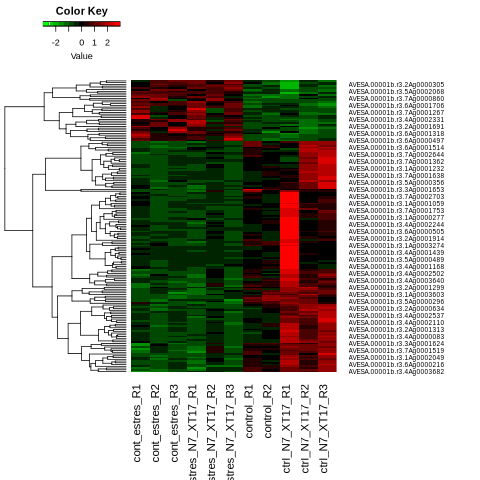

In [149]:
%%R

suppressPackageStartupMessages(library(gplots))
col = greenred


heatmap.2(zscores, col=col, density.info="none", Colv=NULL,
    dendrogram="row", trace="none", margins=MARGINS, lhei=LHEI)

In [150]:
%%R
dim(zscores)


[1] 167  11


In [151]:
%%R

library("pheatmap")
library("RColorBrewer")

g <- pheatmap(zscores,color = colorRampPalette(rev(brewer.pal(n = 7, name = "RdYlBu")))(100),
              border_color = "grey60",
              #scale = "none", 
              cluster_rows = TRUE, 
              cluster_cols = TRUE,
              fontsize_row = 5, 
              fontsize_col = 6, 
              clustering_distance_rows = "correlation",
              clustering_method = "complete", 
              angle_col = c("90"),
              #cellwidth = 5, 
              #cellheight = 5
              width = 10,
              height = 15,
              filename = "heatmap24.pdf"
             )

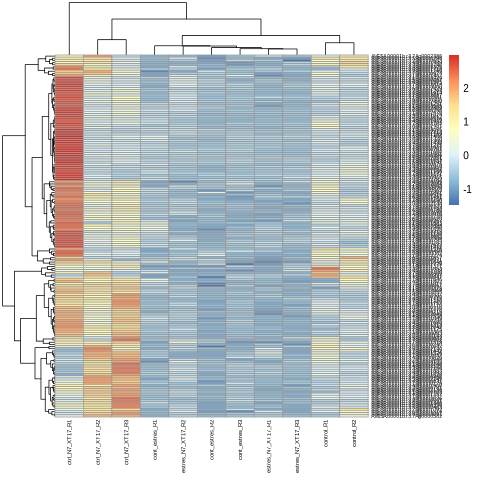

In [112]:
%%R
g

In [ ]:
%%R
help(pheatmap)

In [165]:
%%R
resultsNames(dse)

[1] "Intercept"                   "condition_Control_vs_Estres"


In [166]:
%%R
res <- results(dse)
res

log2 fold change (MLE): condition Control vs Estres 
Wald test p-value: condition Control vs Estres 
DataFrame with 22532 rows and 6 columns
       baseMean log2FoldChange     lfcSE      stat    pvalue      padj
      <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
1      0.000000             NA        NA        NA        NA        NA
2      0.167104      1.5535033  3.149264  0.493291 0.6218070        NA
3     35.282649      0.0614745  0.357213  0.172095 0.8633628  0.969667
4      0.388516      1.5620317  3.148955  0.496048 0.6198607        NA
5     76.949083     -0.5651678  0.273585 -2.065786 0.0388487  0.337856
...         ...            ...       ...       ...       ...       ...
22528   7.86050     -0.2947698  0.489136 -0.602633 0.5467529        NA
22529  10.84603      0.2839364  0.469634  0.604590 0.5454513  0.852317
22530   9.56978     -0.0546504  0.489714 -0.111597 0.9111433  0.977777
22531   6.31608      0.3684979  0.495099  0.744291 0.4567006        NA
22532  

In [167]:
%%R
resLFC <- lfcShrink(dse, coef="condition_Control_vs_Estres", type="apeglm")
resLFC

log2 fold change (MAP): condition Control vs Estres 
Wald test p-value: condition Control vs Estres 
DataFrame with 22532 rows and 5 columns
       baseMean log2FoldChange     lfcSE    pvalue      padj
      <numeric>      <numeric> <numeric> <numeric> <numeric>
1      0.000000             NA        NA        NA        NA
2      0.167104     0.00946394  0.192866 0.6218070        NA
3     35.282649     0.01388914  0.170334 0.8633628  0.969667
4      0.388516     0.01108027  0.193029 0.6198607        NA
5     76.949083    -0.28935502  0.283739 0.0388487  0.337856
...         ...            ...       ...       ...       ...
22528   7.86050    -0.04021237  0.184392 0.5467529        NA
22529  10.84603     0.04216730  0.183656 0.5454513  0.852317
22530   9.56978    -0.00736366  0.179240 0.9111433  0.977777
22531   6.31608     0.05047732  0.187533 0.4567006        NA
22532  20.02216     0.21010336  0.336627 0.0336723  0.316693


using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895


In [168]:
%%R
library("BiocParallel")
register(MulticoreParam(4))

In [169]:
%%R
resOrdered <- res[order(res$pvalue),]

In [170]:
%%R
summary(res)


out of 19124 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 232, 1.2%
LFC < 0 (down)     : 75, 0.39%
outliers [1]       : 73, 0.38%
low counts [2]     : 10276, 54%
(mean count < 9)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [171]:
%%R
sum(res$padj < 0.1, na.rm=TRUE)

[1] 307


In [173]:
%%R
summary(results(dse, alpha=0.05))


out of 19124 with nonzero total read count
adjusted p-value < 0.05
LFC > 0 (up)       : 174, 0.91%
LFC < 0 (down)     : 30, 0.16%
outliers [1]       : 73, 0.38%
low counts [2]     : 16138, 84%
(mean count < 41)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [174]:
%%R
sum(results(dse, alpha=0.05)$padj < 0.05, na.rm=TRUE)

[1] 204


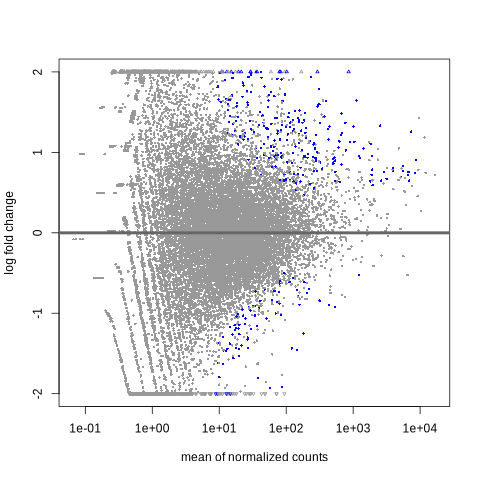

In [179]:
%%R
plotMA(res, ylim=c(-2,2))

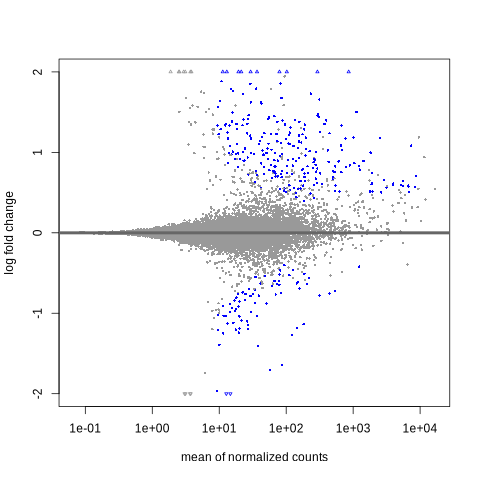

In [178]:
%%R
plotMA(resLFC, ylim=c(-2,2))

NULL


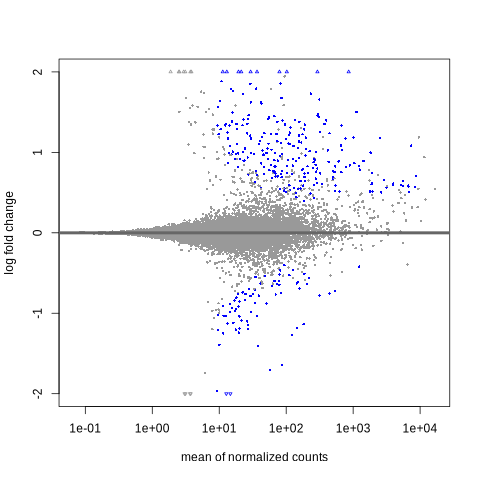

In [190]:
%%R
plotMA(resLFC, ylim=c(-2,2))
idx <- identify(res$baseMean, res$log2FoldChange)
rownames(res)[idx]

In [188]:
%%R
rownames(res)

NULL


In [191]:
%%R
resultsNames(dse)

[1] "Intercept"                   "condition_Control_vs_Estres"


In [193]:
%%R
resNorm <- lfcShrink(dse, coef=2, type="normal")
resAsh <- lfcShrink(dse, coef=2, type="ashr")

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895
using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041


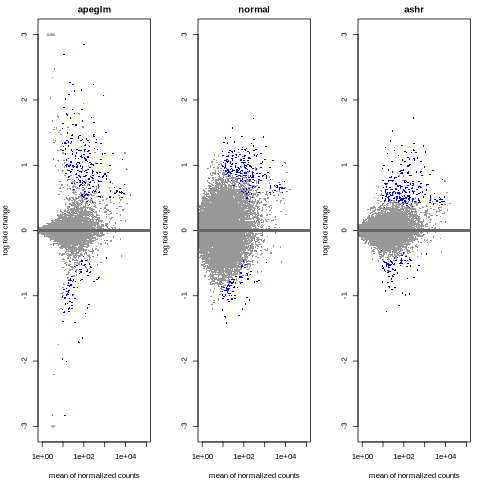

In [194]:
%%R
par(mfrow=c(1,3), mar=c(4,4,2,1))
xlim <- c(1,1e5); ylim <- c(-3,3)
plotMA(resLFC, xlim=xlim, ylim=ylim, main="apeglm")
plotMA(resNorm, xlim=xlim, ylim=ylim, main="normal")
plotMA(resAsh, xlim=xlim, ylim=ylim, main="ashr")

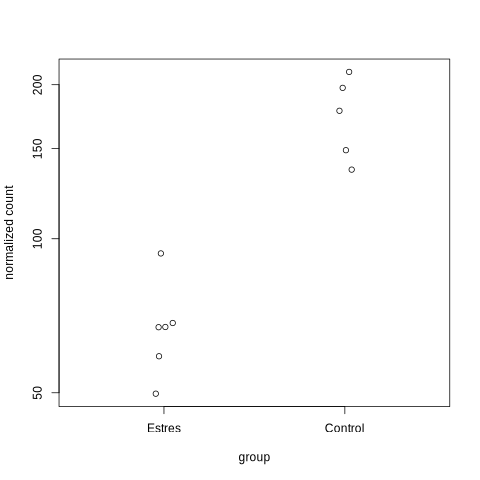

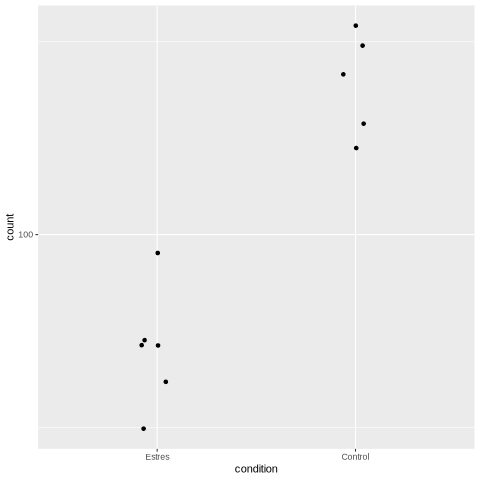

In [196]:
%%R
d <- plotCounts(dse, gene=which.min(res$padj), intgroup="condition", 
                returnData=TRUE)
library("ggplot2")
ggplot(d, aes(x=condition, y=count)) + 
  geom_point(position=position_jitter(w=0.1,h=0)) + 
  scale_y_log10(breaks=c(25,100,400))

In [206]:
%%R
vsd <- vst(dse, blind=FALSE)
rld <- rlog(dse, blind=FALSE)
ntd <- normTransform(dds)
head(assay(vsd), 3)

     cont_estres_R1 cont_estres_R2 cont_estres_R3 control_R1 control_R2
[1,]       2.498394       2.498394       2.498394   2.498394   2.498394
[2,]       2.498394       2.498394       2.498394   2.498394   2.498394
[3,]       6.082714       5.558825       5.404187   4.746171   5.584705
     ctrl_N7_XT17_R1 ctrl_N7_XT17_R2 ctrl_N7_XT17_R3 estres_N7_XT17_R1
[1,]        2.498394        2.498394        2.498394          2.498394
[2,]        2.498394        3.310475        2.498394          2.498394
[3,]        6.308834        5.213089        5.470763          5.111575
     estres_N7_XT17_R2 estres_N7_XT17_R3
[1,]          2.498394          2.498394
[2,]          2.498394          2.498394
[3,]          5.421951          5.079609


In [210]:
%%R
assay(ntd)[select,]

      cont_estres_R1 cont_estres_R2 cont_estres_R3 control_R1 control_R2
 [1,]       13.64813       13.32432       13.43733   14.40595   14.29599
 [2,]       12.51656       13.65240       12.90851   13.50020   13.85002
 [3,]       13.00690       12.99099       12.70952   13.29613   13.36442
 [4,]       13.60146       13.15562       13.07805   13.01911   13.52656
 [5,]       12.51336       12.52290       12.26806   13.14749   13.10574
 [6,]       12.99141       12.92783       12.58364   13.13681   13.52355
 [7,]       12.92642       13.26802       12.86197   13.19023   13.25058
 [8,]       12.71418       12.72101       12.55914   13.19055   13.03889
 [9,]       12.47286       12.91134       12.64007   13.17057   13.12983
[10,]       12.24628       12.76198       12.39848   12.92800   12.68420
[11,]       12.20962       12.08918       12.06810   12.93841   12.59990
[12,]       12.26455       12.62900       12.30932   12.75335   12.89158
[13,]       12.55011       12.29029       12.07077 

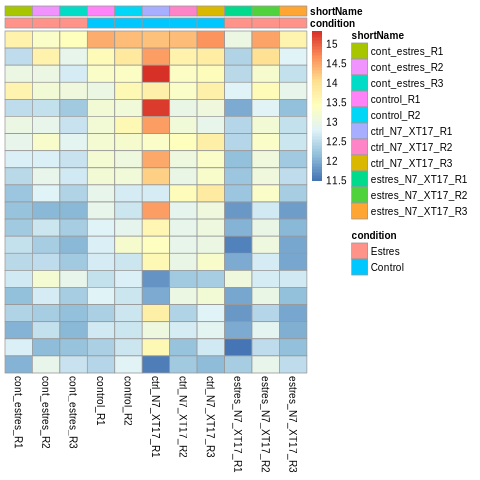

In [220]:
%%R
library("pheatmap")
select <- order(rowMeans(counts(dse,normalized=TRUE)),
                decreasing=TRUE)[1:20]
df <- as.data.frame(colData(dse)[,c("condition","shortName")])
pheatmap(assay(ntd)[select,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df)

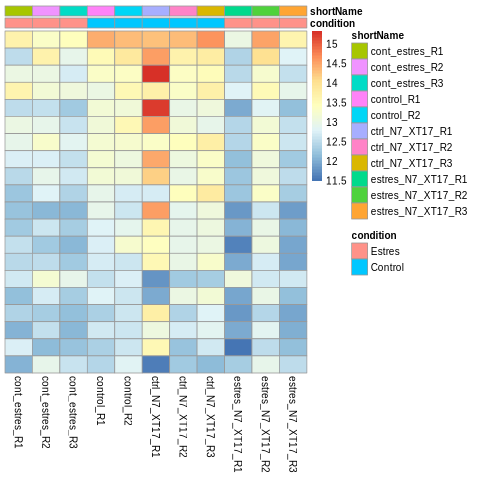

In [221]:
%%R

pheatmap(assay(vsd)[select,], cluster_rows=FALSE, show_rownames=FALSE,
         cluster_cols=FALSE, annotation_col=df)

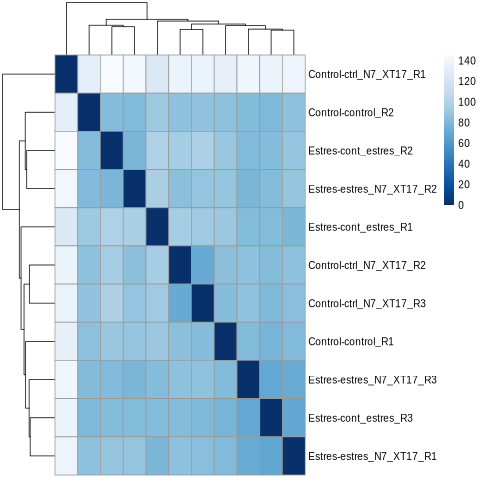

In [225]:
%%R
sampleDists <- dist(t(assay(vsd))) 
library("RColorBrewer")
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(vsd$condition, vsd$shortName, sep="-")
colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows=sampleDists,
         clustering_distance_cols=sampleDists,
         col=colors)

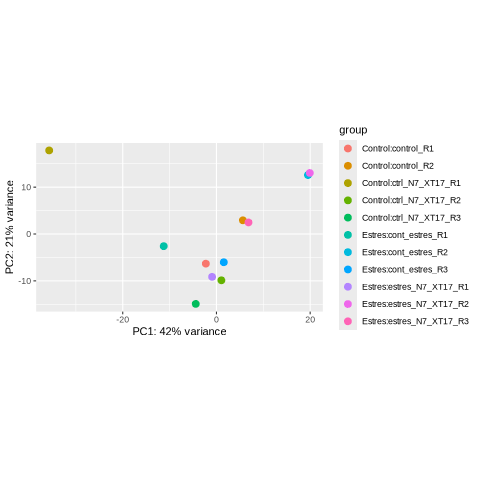

In [226]:
%%R
plotPCA(vsd, intgroup=c("condition", "shortName"))

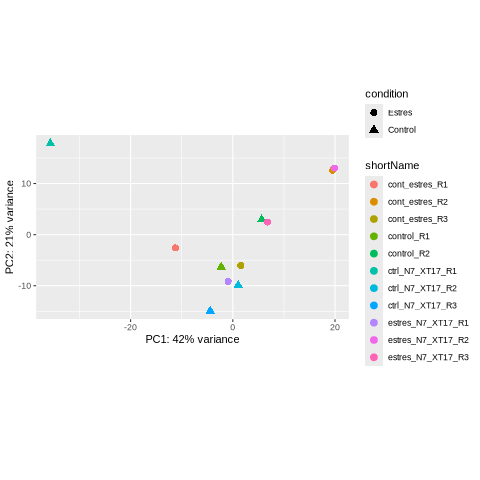

In [229]:
%%R
pcaData <- plotPCA(vsd, intgroup=c("condition", "shortName"), returnData=TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
ggplot(pcaData, aes(PC1, PC2, color=shortName, shape=condition)) +
  geom_point(size=3) +
  xlab(paste0("PC1: ",percentVar[1],"% variance")) +
  ylab(paste0("PC2: ",percentVar[2],"% variance")) + 
  coord_fixed()

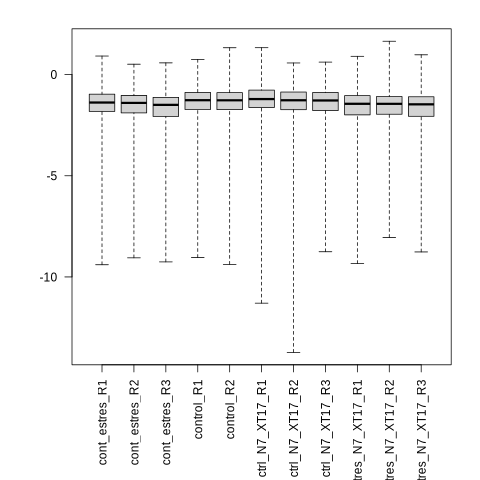

In [231]:
%%R
par(mar=c(8,5,2,2))
boxplot(log10(assays(dse)[["cooks"]]), range=0, las=2)

### Deleting outliers